In [1]:
import keras
import tensorflow as tf
import glob
from pathlib import Path
from astropy.io import fits
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from keras import optimizers

Using TensorFlow backend.


In [2]:
print(tf.__version__)

2.1.0


In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.test.is_built_with_cuda()

True

# DFNN

In [5]:
galaxy = np.zeros(1600)
for filepath in glob.iglob('../Data/cutouts/galaxyfits/*fits', recursive=True):
    fp = Path(filepath)
    hdulist = fits.open(fp)
    scidata = hdulist[0].data
    scidata = scidata.flatten()
    galaxy = np.vstack((galaxy,scidata.transpose()))
galaxy = galaxy[1:,]
print(galaxy.shape)

(3123, 1600)


In [6]:
len(galaxy)

3123

In [7]:
ones = np.ones((len(galaxy),1))
galaxy = np.hstack((galaxy,ones))
print(galaxy)

[[ 26.60893512  60.82042313  30.41021156 ...  60.82042313 -19.00638223
    1.        ]
 [ 64.62169957  22.80765867 -11.40382934 ...  -7.60255289 -38.01276445
    1.        ]
 [ 48.78079796 115.3000679  -88.69235992 ... -53.21541595 -31.04232597
    1.        ]
 ...
 [  0.          69.7310257    8.71637821 ... -17.43275642  47.94008017
    1.        ]
 [  4.35818911  52.29826927  39.22370195 ... -30.50732374 -43.58189106
    1.        ]
 [ 21.79094553  47.94008017  78.44740391 ...  21.79094553 -61.01464748
    1.        ]]


In [8]:
star = np.zeros(1600)
count = 0
for filepath in glob.iglob('../Data/cutouts/starfits/*fits', recursive=True):
    fp = Path(filepath)
    hdulist = fits.open(fp)
    scidata = hdulist[0].data
    scidata = scidata.flatten()
    star = np.vstack((star,scidata.transpose()))
    count += 1
    if count == len(galaxy):
        break
star = star[1:,]
print(star.shape)

(3123, 1600)


In [9]:
zeros = np.zeros((len(star),1))
star = np.hstack((star,zeros))
print(star)

[[ 1.90063822e+01  3.80127645e+01  1.52051058e+01 ... -1.14038293e+02
   4.18140409e+01  0.00000000e+00]
 [ 4.99866815e-12  5.70191467e+01  1.14038293e+01 ... -1.10237017e+02
   4.99866815e-12  0.00000000e+00]
 [-3.80127645e+00  7.22242525e+01  7.60255289e+00 ... -7.60255289e+00
   4.94165938e+01  0.00000000e+00]
 ...
 [ 3.44787161e+01 -3.76131449e+01 -1.25377150e+01 ... -3.76131449e+01
  -3.13442874e+00  0.00000000e+00]
 [-3.13442874e+01  4.07475736e+01  2.19410012e+01 ... -3.13442874e+01
   3.13442874e+01  0.00000000e+00]
 [ 1.56721437e+01 -3.13442874e+01 -3.76131449e+01 ... -4.38820024e+01
   9.40328622e+00  0.00000000e+00]]


In [10]:
df = pd.DataFrame(np.vstack((galaxy,star)))

In [11]:
X = df.drop([1600],axis=1)
y = df[1600]
print(X,y)

           0           1          2          3             4           5     \
0     26.608935   60.820423  30.410212 -19.006382 -4.561532e+01   11.403829   
1     64.621700   22.807659 -11.403829  -3.801276  4.998668e-12  125.442123   
2     48.780798  115.300068 -88.692360 -35.476944 -3.552714e-15  -53.215416   
3      8.716378  -39.223702  13.074567  -4.358189 -3.486551e+01   17.432756   
4     -8.716378   17.432756  56.656458 -13.074567  6.537284e+01  -26.149135   
...         ...         ...        ...        ...           ...         ...   
6241   6.268857   -6.268857  25.075430 -12.537715  9.403286e+00   18.806572   
6242 -12.537715   75.226290   3.134429   9.403286 -2.820986e+01   -3.134429   
6243  34.478716  -37.613145 -12.537715  12.537715  6.268857e+00    6.268857   
6244 -31.344287   40.747574  21.941001  -6.268857  2.194100e+01   15.672144   
6245  15.672144  -31.344287 -37.613145 -34.478716  2.194100e+01   34.478716   

           6             7          8             9

In [12]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X)
transformer
transformer.transform(X)

array([[ 5.93621959e-05,  1.35685019e-04,  6.78425096e-05, ...,
         1.61125960e-04,  1.35685019e-04, -4.24015685e-05],
       [ 1.67091678e-04,  5.89735333e-05, -2.94867667e-05, ...,
         6.88024556e-05, -1.96578444e-05, -9.82892222e-05],
       [ 2.28522769e-04,  5.40144726e-04, -4.15495943e-04, ...,
        -2.28522769e-04, -2.49297566e-04, -1.45423580e-04],
       ...,
       [ 1.58349807e-03, -1.72745244e-03, -5.75817480e-04, ...,
         0.00000000e+00, -1.72745244e-03, -1.43954370e-04],
       [-2.35911285e-03,  3.06684671e-03,  1.65137900e-03, ...,
         3.53866928e-03, -2.35911285e-03,  2.35911285e-03],
       [ 6.55707920e-04, -1.31141584e-03, -1.57369901e-03, ...,
         0.00000000e+00, -1.83598218e-03,  3.93424752e-04]])

In [13]:
X = pd.DataFrame(transformer.transform(X))
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
count,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,...,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000,6246.000000
mean,0.000532,0.000486,0.000338,0.000296,0.000464,0.000487,0.000361,0.000509,0.000427,0.000288,...,0.000649,0.000550,0.000410,0.000222,0.000313,0.000460,0.000475,0.000501,0.000525,0.000699
std,0.013333,0.010730,0.009127,0.008808,0.009077,0.010037,0.012365,0.012497,0.012327,0.010209,...,0.010240,0.009897,0.009812,0.009531,0.009817,0.010328,0.010026,0.010827,0.012201,0.014302
min,-0.046769,-0.048820,-0.046747,-0.052804,-0.043172,-0.044975,-0.045145,-0.039824,-0.226332,-0.109372,...,-0.043176,-0.039813,-0.086491,-0.056570,-0.057899,-0.046037,-0.057203,-0.045459,-0.045208,-0.163675
25%,-0.001335,-0.001454,-0.001463,-0.001422,-0.001363,-0.001419,-0.001452,-0.001504,-0.001526,-0.001472,...,-0.001276,-0.001348,-0.001394,-0.001491,-0.001396,-0.001397,-0.001305,-0.001434,-0.001432,-0.001381
50%,0.000028,0.000009,0.000014,0.000019,0.000027,0.000030,0.000019,0.000035,0.000026,0.000045,...,0.000048,0.000047,0.000042,0.000019,0.000031,0.000024,0.000024,0.000012,0.000016,0.000011
75%,0.001716,0.001667,0.001618,0.001653,0.001638,0.001633,0.001526,0.001597,0.001476,0.001614,...,0.001796,0.001596,0.001631,0.001401,0.001592,0.001641,0.001656,0.001641,0.001589,0.001564
max,0.749077,0.477454,0.233318,0.194644,0.156820,0.315806,0.563615,0.499648,0.524072,0.381915,...,0.337170,0.348117,0.256195,0.249393,0.359902,0.464029,0.309904,0.416777,0.448118,0.496360


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
from keras import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(256, activation='relu', kernel_initializer='random_normal', input_dim=1600, ))
classifier.add(Dropout(0.5))
#Second  Hidden Layer
classifier.add(Dense(64, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.5))
#Third  Hidden Layer
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.5))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#Compiling the neural network
classifier.compile(optimizer ='Adadelta',loss='binary_crossentropy', metrics =['accuracy'])
#Fitting the data to the training dataset
history = classifier.fit(X_train,y_train, batch_size=32, epochs=1024, shuffle=True, use_multiprocessing=True)

Epoch 1/1024
4996/4996 [==============================] - 1s 140us/step - loss: 0.6903 - accuracy: 0.5308
Epoch 2/1024
4996/4996 [==============================] - 0s 66us/step - loss: 0.5432 - accuracy: 0.7414
Epoch 3/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.4269 - accuracy: 0.8233
Epoch 4/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.4080 - accuracy: 0.8419
Epoch 5/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.3917 - accuracy: 0.8553
Epoch 6/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.3787 - accuracy: 0.8639
Epoch 7/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.3760 - accuracy: 0.8661
Epoch 8/1024
4996/4996 [==============================] - 0s 75us/step - loss: 0.3600 - accuracy: 0.8699
Epoch 9/1024
4996/4996 [==============================] - 0s 70us/step - loss: 0.3485 - accuracy: 0.8757
Epoch 10/1024
4996/4996 [=============================

Epoch 78/1024
4996/4996 [==============================] - 0s 66us/step - loss: 0.1385 - accuracy: 0.9494
Epoch 79/1024
4996/4996 [==============================] - 0s 66us/step - loss: 0.1480 - accuracy: 0.9528
Epoch 80/1024
4996/4996 [==============================] - 0s 66us/step - loss: 0.1365 - accuracy: 0.9530
Epoch 81/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.1360 - accuracy: 0.9546
Epoch 82/1024
4996/4996 [==============================] - 0s 65us/step - loss: 0.1408 - accuracy: 0.9488
Epoch 83/1024
4996/4996 [==============================] - 0s 70us/step - loss: 0.1321 - accuracy: 0.9534
Epoch 84/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.1339 - accuracy: 0.9560
Epoch 85/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.1307 - accuracy: 0.9554
Epoch 86/1024
4996/4996 [==============================] - 0s 69us/step - loss: 0.1345 - accuracy: 0.9518
Epoch 87/1024
4996/4996 [=====================

4996/4996 [==============================] - 0s 71us/step - loss: 0.1021 - accuracy: 0.9644
Epoch 231/1024
4996/4996 [==============================] - 0s 74us/step - loss: 0.0928 - accuracy: 0.9676
Epoch 232/1024
4996/4996 [==============================] - 0s 72us/step - loss: 0.0996 - accuracy: 0.9662
Epoch 233/1024
4996/4996 [==============================] - 0s 70us/step - loss: 0.0985 - accuracy: 0.9654
Epoch 234/1024
4996/4996 [==============================] - 0s 69us/step - loss: 0.0971 - accuracy: 0.9648
Epoch 235/1024
4996/4996 [==============================] - 0s 72us/step - loss: 0.1081 - accuracy: 0.9632
Epoch 236/1024
4996/4996 [==============================] - 0s 71us/step - loss: 0.0922 - accuracy: 0.9660
Epoch 237/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.1018 - accuracy: 0.9646
Epoch 238/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.1016 - accuracy: 0.9604
Epoch 239/1024
4996/4996 [==========================

4996/4996 [==============================] - 0s 67us/step - loss: 0.0934 - accuracy: 0.9660
Epoch 383/1024
4996/4996 [==============================] - 0s 70us/step - loss: 0.0962 - accuracy: 0.9652
Epoch 384/1024
4996/4996 [==============================] - 0s 70us/step - loss: 0.0915 - accuracy: 0.9716
Epoch 385/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0956 - accuracy: 0.9672
Epoch 386/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.1035 - accuracy: 0.9650
Epoch 387/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0841 - accuracy: 0.9680
Epoch 388/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0995 - accuracy: 0.9654
Epoch 389/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0844 - accuracy: 0.9690
Epoch 390/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0917 - accuracy: 0.9634
Epoch 391/1024
4996/4996 [==========================

4996/4996 [==============================] - 0s 67us/step - loss: 0.0766 - accuracy: 0.9734
Epoch 535/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0878 - accuracy: 0.9680
Epoch 536/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0881 - accuracy: 0.9706
Epoch 537/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0921 - accuracy: 0.9682
Epoch 538/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0924 - accuracy: 0.9684
Epoch 539/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0903 - accuracy: 0.9700
Epoch 540/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0957 - accuracy: 0.9708
Epoch 541/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0860 - accuracy: 0.9688
Epoch 542/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0844 - accuracy: 0.9694
Epoch 543/1024
4996/4996 [==========================

4996/4996 [==============================] - 0s 68us/step - loss: 0.0818 - accuracy: 0.9726
Epoch 687/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0820 - accuracy: 0.9716
Epoch 688/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0759 - accuracy: 0.9724
Epoch 689/1024
4996/4996 [==============================] - 0s 69us/step - loss: 0.0861 - accuracy: 0.9698
Epoch 690/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0788 - accuracy: 0.9680
Epoch 691/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0834 - accuracy: 0.9680
Epoch 692/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0808 - accuracy: 0.9714
Epoch 693/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0712 - accuracy: 0.9738
Epoch 694/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0878 - accuracy: 0.9708
Epoch 695/1024
4996/4996 [==========================

4996/4996 [==============================] - 0s 67us/step - loss: 0.0823 - accuracy: 0.9682
Epoch 839/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0840 - accuracy: 0.9704
Epoch 840/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0778 - accuracy: 0.9734
Epoch 841/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0899 - accuracy: 0.9660
Epoch 842/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0677 - accuracy: 0.9740
Epoch 843/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0882 - accuracy: 0.9700
Epoch 844/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0862 - accuracy: 0.9726
Epoch 845/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0804 - accuracy: 0.9692
Epoch 846/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0826 - accuracy: 0.9684
Epoch 847/1024
4996/4996 [==========================

4996/4996 [==============================] - 0s 67us/step - loss: 0.0799 - accuracy: 0.9712
Epoch 991/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0882 - accuracy: 0.9692
Epoch 992/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0825 - accuracy: 0.9710
Epoch 993/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0800 - accuracy: 0.9730
Epoch 994/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0657 - accuracy: 0.9746
Epoch 995/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0746 - accuracy: 0.9740
Epoch 996/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0772 - accuracy: 0.9712
Epoch 997/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0675 - accuracy: 0.9750
Epoch 998/1024
4996/4996 [==============================] - 0s 69us/step - loss: 0.0922 - accuracy: 0.9690
Epoch 999/1024
4996/4996 [==========================

In [16]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.savefig('../Figures/FNN_AdaDelta.png')
plt.show()

<Figure size 640x480 with 1 Axes>

In [17]:
from keras import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(256, activation='relu', kernel_initializer='random_normal', input_dim=1600, ))
classifier.add(Dropout(0.5))
#Second  Hidden Layer
classifier.add(Dense(64, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.5))
#Third  Hidden Layer
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.5))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#Compiling the neural network
classifier.compile(optimizer ='Adam',loss='binary_crossentropy', metrics =['accuracy'])
#Fitting the data to the training dataset
history = classifier.fit(X_train,y_train, batch_size=32, epochs=1024, shuffle=True, use_multiprocessing=True)

Epoch 1/1024
4996/4996 [==============================] - 0s 98us/step - loss: 0.5964 - accuracy: 0.7026
Epoch 2/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.4360 - accuracy: 0.8449
Epoch 3/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.4090 - accuracy: 0.8621
Epoch 4/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.3910 - accuracy: 0.8697
Epoch 5/1024
4996/4996 [==============================] - 0s 75us/step - loss: 0.3889 - accuracy: 0.8765
Epoch 6/1024
4996/4996 [==============================] - 0s 71us/step - loss: 0.3757 - accuracy: 0.8817
Epoch 7/1024
4996/4996 [==============================] - 0s 70us/step - loss: 0.3425 - accuracy: 0.8921
Epoch 8/1024
4996/4996 [==============================] - 0s 69us/step - loss: 0.3414 - accuracy: 0.8933
Epoch 9/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.3184 - accuracy: 0.8963
Epoch 10/1024
4996/4996 [==============================

4996/4996 [==============================] - 0s 68us/step - loss: 0.0983 - accuracy: 0.9652
Epoch 155/1024
4996/4996 [==============================] - 0s 66us/step - loss: 0.1175 - accuracy: 0.9584
Epoch 156/1024
4996/4996 [==============================] - 0s 69us/step - loss: 0.0997 - accuracy: 0.9622
Epoch 157/1024
4996/4996 [==============================] - 0s 69us/step - loss: 0.1046 - accuracy: 0.9602
Epoch 158/1024
4996/4996 [==============================] - 0s 69us/step - loss: 0.1055 - accuracy: 0.9612
Epoch 159/1024
4996/4996 [==============================] - 0s 69us/step - loss: 0.1155 - accuracy: 0.9596
Epoch 160/1024
4996/4996 [==============================] - 0s 69us/step - loss: 0.1036 - accuracy: 0.9608
Epoch 161/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.1040 - accuracy: 0.9618
Epoch 162/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.1158 - accuracy: 0.9614
Epoch 163/1024
4996/4996 [==========================

4996/4996 [==============================] - 0s 68us/step - loss: 0.0787 - accuracy: 0.9690
Epoch 307/1024
4996/4996 [==============================] - 0s 69us/step - loss: 0.1010 - accuracy: 0.9614
Epoch 308/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0893 - accuracy: 0.9672
Epoch 309/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0801 - accuracy: 0.9694
Epoch 310/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0925 - accuracy: 0.9652
Epoch 311/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0930 - accuracy: 0.9640
Epoch 312/1024
4996/4996 [==============================] - 0s 69us/step - loss: 0.0835 - accuracy: 0.9686
Epoch 313/1024
4996/4996 [==============================] - 0s 70us/step - loss: 0.1026 - accuracy: 0.9632
Epoch 314/1024
4996/4996 [==============================] - 0s 69us/step - loss: 0.0935 - accuracy: 0.9662
Epoch 315/1024
4996/4996 [==========================

4996/4996 [==============================] - 0s 68us/step - loss: 0.0831 - accuracy: 0.9688
Epoch 459/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0804 - accuracy: 0.9688
Epoch 460/1024
4996/4996 [==============================] - 0s 69us/step - loss: 0.0832 - accuracy: 0.9690
Epoch 461/1024
4996/4996 [==============================] - 0s 69us/step - loss: 0.0890 - accuracy: 0.9684
Epoch 462/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0789 - accuracy: 0.9704
Epoch 463/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0829 - accuracy: 0.9704
Epoch 464/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0844 - accuracy: 0.9670
Epoch 465/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0822 - accuracy: 0.9692
Epoch 466/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0885 - accuracy: 0.9660
Epoch 467/1024
4996/4996 [==========================

4996/4996 [==============================] - 0s 69us/step - loss: 0.0779 - accuracy: 0.9700
Epoch 535/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0742 - accuracy: 0.9708
Epoch 536/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0767 - accuracy: 0.9700
Epoch 537/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0831 - accuracy: 0.9670
Epoch 538/1024
4996/4996 [==============================] - 0s 69us/step - loss: 0.0758 - accuracy: 0.9694
Epoch 539/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0764 - accuracy: 0.9710
Epoch 540/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0797 - accuracy: 0.9686
Epoch 541/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0803 - accuracy: 0.9714
Epoch 542/1024
4996/4996 [==============================] - 0s 70us/step - loss: 0.0810 - accuracy: 0.9682
Epoch 543/1024
4996/4996 [==========================

4996/4996 [==============================] - 0s 67us/step - loss: 0.0739 - accuracy: 0.9700
Epoch 687/1024
4996/4996 [==============================] - 0s 69us/step - loss: 0.0831 - accuracy: 0.9692
Epoch 688/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0708 - accuracy: 0.9728
Epoch 689/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0683 - accuracy: 0.9728
Epoch 690/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0743 - accuracy: 0.9746
Epoch 691/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0798 - accuracy: 0.9688
Epoch 692/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0654 - accuracy: 0.9746
Epoch 693/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0832 - accuracy: 0.9696
Epoch 694/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0761 - accuracy: 0.9696
Epoch 695/1024
4996/4996 [==========================

4996/4996 [==============================] - 0s 69us/step - loss: 0.0737 - accuracy: 0.9714
Epoch 839/1024
4996/4996 [==============================] - 0s 69us/step - loss: 0.0777 - accuracy: 0.9688
Epoch 840/1024
4996/4996 [==============================] - 0s 69us/step - loss: 0.0904 - accuracy: 0.9690
Epoch 841/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0708 - accuracy: 0.9716
Epoch 842/1024
4996/4996 [==============================] - 0s 67us/step - loss: 0.0685 - accuracy: 0.9740
Epoch 843/1024
4996/4996 [==============================] - 0s 69us/step - loss: 0.0710 - accuracy: 0.9704
Epoch 844/1024
4996/4996 [==============================] - 0s 69us/step - loss: 0.0673 - accuracy: 0.9722
Epoch 845/1024
4996/4996 [==============================] - 0s 70us/step - loss: 0.0688 - accuracy: 0.9738
Epoch 846/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0659 - accuracy: 0.9752
Epoch 847/1024
4996/4996 [==========================

4996/4996 [==============================] - 0s 69us/step - loss: 0.0674 - accuracy: 0.9734
Epoch 991/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0676 - accuracy: 0.9742
Epoch 992/1024
4996/4996 [==============================] - 0s 69us/step - loss: 0.0687 - accuracy: 0.9726
Epoch 993/1024
4996/4996 [==============================] - 0s 69us/step - loss: 0.0659 - accuracy: 0.9738
Epoch 994/1024
4996/4996 [==============================] - 0s 70us/step - loss: 0.0690 - accuracy: 0.9732
Epoch 995/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0668 - accuracy: 0.9732
Epoch 996/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0678 - accuracy: 0.9728
Epoch 997/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0690 - accuracy: 0.9726
Epoch 998/1024
4996/4996 [==============================] - 0s 68us/step - loss: 0.0663 - accuracy: 0.9728
Epoch 999/1024
4996/4996 [==========================

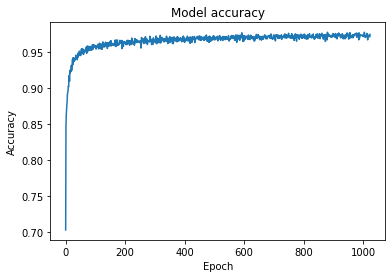

In [18]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.savefig('../Figures/FNN_Adam.png')
plt.show()

In [54]:
from keras import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(256, activation='relu', kernel_initializer='random_normal', input_dim=1600, ))
classifier.add(Dropout(0.5))
#Second  Hidden Layer
classifier.add(Dense(64, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.5))
#Third  Hidden Layer
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.5))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
#Compiling the neural network
classifier.compile(optimizer =optimizers.Adam(amsgrad=True),loss='binary_crossentropy', metrics =['accuracy'])
#Fitting the data to the training dataset
history = classifier.fit(X_train,y_train, batch_size=32, epochs=1024, shuffle=True, use_multiprocessing=True)

ValueError: Error when checking input: expected dense_19_input to have 2 dimensions, but got array with shape (4996, 40, 40, 1)

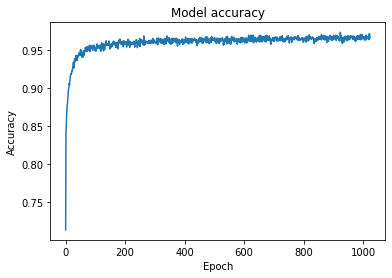

In [20]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.savefig('../Figures/FNN_Adam_AMSGrad.png')
plt.show()

In [21]:
from keras.utils import plot_model
plot_model(model, to_file='../Figures/FNN_model_self.png',show_shapes=True, show_layer_names=True)

NameError: name 'model' is not defined

In [22]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               409856    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 520       
_________________________________________________________________
dropout_9 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                

In [23]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

4996/4996 [==============================] - 0s 36us/step


In [24]:
from sklearn.metrics import confusion_matrix, f1_score, matthews_corrcoef
f1 = f1_score(y_test, y_pred)
MCC = matthews_corrcoef(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[540  87]
 [ 91 532]]


In [25]:
print("Error Rate:"+'{:.3%}'.format((cm[0,1]+cm[1,0])/np.sum(cm)))
print("Accuracy:"+'{:.3%}'.format((cm[0,0]+cm[1,1])/np.sum(cm)))
print("Sensitivity:"+'{:.3%}'.format((cm[0,0])/np.sum(cm[0,:])))
print("Specificity :"+'{:.3%}'.format((cm[1,1])/np.sum(cm[1,:])))
print("Precision:"+'{:.3%}'.format((cm[0,0])/np.sum(cm[:,0])))
print("False Positive Rate:"+'{:.3%}'.format(1-((cm[1,1])/np.sum(cm[1,:]))))
print("Matthews Correlation Coefficient:"+'{:.3%}'.format(MCC))
print("F1 Score:"+'{:.3%}'.format(f1))

Error Rate:14.240%
Accuracy:85.760%
Sensitivity:86.124%
Specificity :85.393%
Precision:85.578%
False Positive Rate:14.607%
Matthews Correlation Coefficient:71.521%
F1 Score:85.668%


In [ ]:
def MCC(matrix):
    '''
    Calcualtes the Matthews Correlation Coefficient from a confusion matrix
    '''
    return ((matrix[0,0]*matrix[1,1])-(matrix[1,0]*matrix[0,1]))/np.sqrt((cm[0,0]+cm[1,0])*(cm[0,0]+cm[0,1])*(cm[1,1]+cm[1,0])*(cm[1,1]+cm[0,1]))

# CNN

In [26]:
galaxy = np.zeros((40,40))
for filepath in glob.iglob('../Data/cutouts/galaxyfits/*fits', recursive=True):
    fp = Path(filepath)
    hdulist = fits.open(fp)
    scidata = hdulist[0].data
    galaxy = np.dstack((galaxy,scidata))
galaxy = galaxy[:,:,1:]
print(galaxy.shape[2])

3123


In [27]:
star = np.zeros((40,40))
count = 0
for filepath in glob.iglob('../Data/cutouts/starfits/*fits', recursive=True):
    fp = Path(filepath)
    hdulist = fits.open(fp)
    scidata = hdulist[0].data
    scidata = scidata
    star = np.dstack((star,scidata))
    count += 1
    if count == galaxy.shape[2]:
        break
star = star[:,:,1:]
print(star.shape)

(40, 40, 3123)


In [28]:
X = np.dstack((galaxy,star))
y = np.dstack((np.ones((1,1,galaxy.shape[2])),np.zeros((1,1,galaxy.shape[2]))))
print(X.shape)

(40, 40, 6246)


In [29]:
X = np.moveaxis(X, -1, 0)
y = np.moveaxis(y, -1, 0)

In [30]:
print(y.shape)

(6246, 1, 1)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [33]:
X_train = X_train.reshape(len(X_train),40,40,1)
X_test = X_test.reshape(len(X_test),40,40,1)

In [55]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
#create model
model = Sequential()
#add model layers
model.add(Conv2D(16, kernel_size=5, activation='relu', input_shape=(40,40,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='random_normal'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
#Compiling the neural network
model.compile(optimizer =optimizers.Adam(amsgrad=True),loss='binary_crossentropy', metrics =['accuracy'])
#Fitting the data to the training dataset
history = model.fit(X_train,y_train, batch_size=32, epochs=1, shuffle=True, use_multiprocessing=True)

Epoch 1/1
4996/4996 [==============================] - 9s 2ms/step - loss: 43.7648 - accuracy: 0.6789


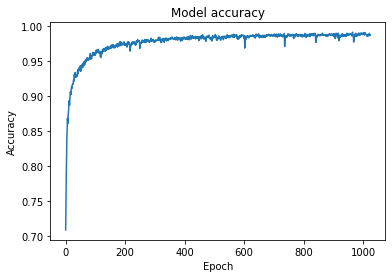

In [35]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.savefig('../Figures/CNN_self.png')
plt.show()

In [36]:
eval_model=model.evaluate(X_train, y_train)
eval_model
y_pred=model.predict(X_test)
y_pred =(y_pred>0.5)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, matthews_corrcoef
cm = confusion_matrix(y_test, y_pred)
print(cm)
f1 = f1_score(y_test, y_pred)
MCC = matthews_corrcoef(y_test, y_pred)

4996/4996 [==============================] - 0s 46us/step
[[583  54]
 [ 49 564]]


In [37]:
print("Error Rate:"+'{:.3%}'.format((cm[0,1]+cm[1,0])/np.sum(cm)))
print("Accuracy:"+'{:.3%}'.format((cm[0,0]+cm[1,1])/np.sum(cm)))
print("Sensitivity:"+'{:.3%}'.format((cm[0,0])/np.sum(cm[0,:])))
print("Specificity :"+'{:.3%}'.format((cm[1,1])/np.sum(cm[1,:])))
print("Precision:"+'{:.3%}'.format((cm[0,0])/np.sum(cm[:,0])))
print("False Positive Rate:"+'{:.3%}'.format(1-((cm[1,1])/np.sum(cm[1,:]))))
print("Matthews Correlation Coefficient:"+'{:.3%}'.format(MCC))
print("F1:"+'{:.3%}'.format(f1))

Error Rate:8.240%
Accuracy:91.760%
Sensitivity:91.523%
Specificity :92.007%
Precision:92.247%
False Positive Rate:7.993%
Matthews Correlation Coefficient:83.519%
F1:91.633%


In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='../Figures/CNN_model_self.png',show_shapes=True, show_layer_names=True)

In [45]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
#create model
model = Sequential()
#add model layers
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(40,40,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Conv2D(32, kernel_size=5, activation='relu',strides=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(64, kernel_size=5, activation='relu',strides=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
#Compiling the neural network
model.compile(optimizer =optimizers.Adam(amsgrad=True),loss='binary_crossentropy', metrics =['accuracy'])
#Fitting the data to the training dataset
history = model.fit(X_train,y_train, batch_size=32, epochs=1024, shuffle=True, use_multiprocessing=True)

Epoch 1/1024
4996/4996 [==============================] - 1s 229us/step - loss: 9.3859 - accuracy: 0.6121
Epoch 2/1024
4996/4996 [==============================] - 1s 172us/step - loss: 0.6424 - accuracy: 0.6723
Epoch 3/1024
4996/4996 [==============================] - 1s 173us/step - loss: 0.5741 - accuracy: 0.7292
Epoch 4/1024
4996/4996 [==============================] - 1s 173us/step - loss: 0.4816 - accuracy: 0.7902
Epoch 5/1024
4996/4996 [==============================] - 1s 172us/step - loss: 0.4242 - accuracy: 0.8267
Epoch 6/1024
4996/4996 [==============================] - 1s 177us/step - loss: 0.3910 - accuracy: 0.8375
Epoch 7/1024
4996/4996 [==============================] - 1s 172us/step - loss: 0.4162 - accuracy: 0.8261
Epoch 8/1024
4996/4996 [==============================] - 1s 175us/step - loss: 0.3834 - accuracy: 0.8351
Epoch 9/1024
4996/4996 [==============================] - 1s 175us/step - loss: 0.3634 - accuracy: 0.8513
Epoch 10/1024
4996/4996 [=====================

4996/4996 [==============================] - 1s 177us/step - loss: 0.0854 - accuracy: 0.9644
Epoch 154/1024
4996/4996 [==============================] - 1s 172us/step - loss: 0.0931 - accuracy: 0.9676
Epoch 155/1024
4996/4996 [==============================] - 1s 173us/step - loss: 0.0855 - accuracy: 0.9648
Epoch 156/1024
4996/4996 [==============================] - 1s 177us/step - loss: 0.0837 - accuracy: 0.9684
Epoch 157/1024
4996/4996 [==============================] - 1s 170us/step - loss: 0.0874 - accuracy: 0.9650
Epoch 158/1024
4996/4996 [==============================] - 1s 171us/step - loss: 0.0884 - accuracy: 0.9664
Epoch 159/1024
4996/4996 [==============================] - 1s 177us/step - loss: 0.0967 - accuracy: 0.9612
Epoch 160/1024
4996/4996 [==============================] - 1s 179us/step - loss: 0.0895 - accuracy: 0.9630
Epoch 161/1024
4996/4996 [==============================] - 1s 173us/step - loss: 0.0900 - accuracy: 0.9622
Epoch 162/1024
4996/4996 [=================

Epoch 229/1024
4996/4996 [==============================] - 1s 172us/step - loss: 0.0646 - accuracy: 0.9738
Epoch 230/1024
4996/4996 [==============================] - 1s 171us/step - loss: 0.0733 - accuracy: 0.9698
Epoch 231/1024
4996/4996 [==============================] - 1s 172us/step - loss: 0.0623 - accuracy: 0.9720
Epoch 232/1024
4996/4996 [==============================] - 1s 171us/step - loss: 0.0621 - accuracy: 0.9716
Epoch 233/1024
4996/4996 [==============================] - 1s 175us/step - loss: 0.0604 - accuracy: 0.9738
Epoch 234/1024
4996/4996 [==============================] - 1s 169us/step - loss: 0.0662 - accuracy: 0.9710
Epoch 235/1024
4996/4996 [==============================] - 1s 174us/step - loss: 0.0601 - accuracy: 0.9760
Epoch 236/1024
4996/4996 [==============================] - 1s 178us/step - loss: 0.0643 - accuracy: 0.9732
Epoch 237/1024
4996/4996 [==============================] - 1s 178us/step - loss: 0.0655 - accuracy: 0.9740
Epoch 238/1024
4996/4996 [==

Epoch 380/1024
4996/4996 [==============================] - 1s 176us/step - loss: 0.0414 - accuracy: 0.9844
Epoch 381/1024
4996/4996 [==============================] - 1s 178us/step - loss: 0.0359 - accuracy: 0.9826
Epoch 382/1024
4996/4996 [==============================] - 1s 174us/step - loss: 0.0384 - accuracy: 0.9812
Epoch 383/1024
4996/4996 [==============================] - 1s 173us/step - loss: 0.0364 - accuracy: 0.9822
Epoch 384/1024
4996/4996 [==============================] - 1s 174us/step - loss: 0.0379 - accuracy: 0.9828
Epoch 385/1024
4996/4996 [==============================] - 1s 175us/step - loss: 0.0355 - accuracy: 0.9830
Epoch 386/1024
4996/4996 [==============================] - 1s 176us/step - loss: 0.0372 - accuracy: 0.9830
Epoch 387/1024
4996/4996 [==============================] - 1s 174us/step - loss: 0.0393 - accuracy: 0.9800
Epoch 388/1024
4996/4996 [==============================] - 1s 174us/step - loss: 0.0298 - accuracy: 0.9848
Epoch 389/1024
4996/4996 [==

Epoch 531/1024
4996/4996 [==============================] - 1s 174us/step - loss: 0.0251 - accuracy: 0.9866
Epoch 532/1024
4996/4996 [==============================] - 1s 174us/step - loss: 0.0289 - accuracy: 0.9844
Epoch 533/1024
4996/4996 [==============================] - 1s 173us/step - loss: 0.0245 - accuracy: 0.9884
Epoch 534/1024
4996/4996 [==============================] - 1s 173us/step - loss: 0.0235 - accuracy: 0.9868
Epoch 535/1024
4996/4996 [==============================] - 1s 174us/step - loss: 0.0222 - accuracy: 0.9880
Epoch 536/1024
4996/4996 [==============================] - 1s 174us/step - loss: 0.0251 - accuracy: 0.9864
Epoch 537/1024
4996/4996 [==============================] - 1s 175us/step - loss: 0.0273 - accuracy: 0.9856
Epoch 538/1024
4996/4996 [==============================] - 1s 174us/step - loss: 0.0405 - accuracy: 0.9810
Epoch 539/1024
4996/4996 [==============================] - 1s 173us/step - loss: 0.0265 - accuracy: 0.9878
Epoch 540/1024
4996/4996 [==

Epoch 682/1024
4996/4996 [==============================] - 1s 175us/step - loss: 0.0204 - accuracy: 0.9888
Epoch 683/1024
4996/4996 [==============================] - 1s 174us/step - loss: 0.0207 - accuracy: 0.9880
Epoch 684/1024
4996/4996 [==============================] - 1s 174us/step - loss: 0.0215 - accuracy: 0.9880
Epoch 685/1024
4996/4996 [==============================] - 1s 174us/step - loss: 0.0314 - accuracy: 0.9864
Epoch 686/1024
4996/4996 [==============================] - 1s 174us/step - loss: 0.0202 - accuracy: 0.9894
Epoch 687/1024
4996/4996 [==============================] - 1s 176us/step - loss: 0.0226 - accuracy: 0.9886
Epoch 688/1024
4996/4996 [==============================] - 1s 188us/step - loss: 0.0250 - accuracy: 0.9872
Epoch 689/1024
4996/4996 [==============================] - 1s 187us/step - loss: 0.0196 - accuracy: 0.9884
Epoch 690/1024
4996/4996 [==============================] - 1s 178us/step - loss: 0.0222 - accuracy: 0.9866
Epoch 691/1024
4996/4996 [==

Epoch 833/1024
4996/4996 [==============================] - 1s 175us/step - loss: 0.0209 - accuracy: 0.9898
Epoch 834/1024
4996/4996 [==============================] - 1s 177us/step - loss: 0.0223 - accuracy: 0.9882
Epoch 835/1024
4996/4996 [==============================] - 1s 176us/step - loss: 0.0214 - accuracy: 0.9874
Epoch 836/1024
4996/4996 [==============================] - 1s 175us/step - loss: 0.0194 - accuracy: 0.9872
Epoch 837/1024
4996/4996 [==============================] - 1s 174us/step - loss: 0.0174 - accuracy: 0.9884
Epoch 838/1024
4996/4996 [==============================] - 1s 175us/step - loss: 0.0165 - accuracy: 0.9886
Epoch 839/1024
4996/4996 [==============================] - 1s 175us/step - loss: 0.0187 - accuracy: 0.9888
Epoch 840/1024
4996/4996 [==============================] - 1s 175us/step - loss: 0.0170 - accuracy: 0.9904
Epoch 841/1024
4996/4996 [==============================] - 1s 175us/step - loss: 0.0174 - accuracy: 0.9908
Epoch 842/1024
4996/4996 [==

Epoch 984/1024
4996/4996 [==============================] - 1s 175us/step - loss: 0.0159 - accuracy: 0.9890
Epoch 985/1024
4996/4996 [==============================] - 1s 173us/step - loss: 0.0155 - accuracy: 0.9908
Epoch 986/1024
4996/4996 [==============================] - 1s 174us/step - loss: 0.0161 - accuracy: 0.9906
Epoch 987/1024
4996/4996 [==============================] - 1s 175us/step - loss: 0.0173 - accuracy: 0.9882
Epoch 988/1024
4996/4996 [==============================] - 1s 176us/step - loss: 0.0168 - accuracy: 0.9880
Epoch 989/1024
4996/4996 [==============================] - 1s 178us/step - loss: 0.0171 - accuracy: 0.9892
Epoch 990/1024
4996/4996 [==============================] - 1s 173us/step - loss: 0.0160 - accuracy: 0.9892
Epoch 991/1024
4996/4996 [==============================] - 1s 178us/step - loss: 0.0156 - accuracy: 0.9900
Epoch 992/1024
4996/4996 [==============================] - 1s 180us/step - loss: 0.0147 - accuracy: 0.9900
Epoch 993/1024
4996/4996 [==

In [46]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 38, 38, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 36, 36, 32)        9248      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 32)        25632     
_________________________________________________________________
dropout_15 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 64)         

In [47]:
from keras.utils import plot_model
plot_model(model, to_file='../Figures/CNN_model.png',show_shapes=True, show_layer_names=True)

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [48]:
eval_model=model.evaluate(X_train, y_train)
eval_model
y_pred=model.predict(X_test)
y_pred =(y_pred>0.5)

4996/4996 [==============================] - 0s 70us/step


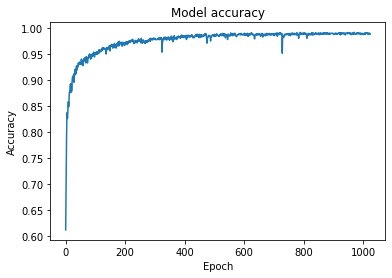

In [49]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.savefig('../Figures/CNN_MNIST.png')
plt.show()

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[614  23]
 [ 66 547]]


In [51]:
print(cm[0,1])

23


In [52]:
from sklearn.metrics import confusion_matrix, f1_score, matthews_corrcoef
f1 = f1_score(y_test, y_pred)
MCC = matthews_corrcoef(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Error Rate:"+'{:.3%}'.format((cm[0,1]+cm[1,0])/np.sum(cm)))
print("Accuracy:"+'{:.3%}'.format((cm[0,0]+cm[1,1])/np.sum(cm)))
print("Sensitivity:"+'{:.3%}'.format((cm[0,0])/np.sum(cm[0,:])))
print("Specificity :"+'{:.3%}'.format((cm[1,1])/np.sum(cm[1,:])))
print("Precision:"+'{:.3%}'.format((cm[0,0])/np.sum(cm[:,0])))
print("False Positive Rate:"+'{:.3%}'.format(1-((cm[1,1])/np.sum(cm[1,:]))))
print("Matthews Correlation Coefficient:"+'{:.3%}'.format(MCC))
print("F1 Score:"+'{:.3%}'.format(f1))

[[614  23]
 [ 66 547]]
Error Rate:7.120%
Accuracy:92.880%
Sensitivity:96.389%
Specificity :89.233%
Precision:90.294%
False Positive Rate:10.767%
Matthews Correlation Coefficient:85.940%
F1 Score:92.477%


In [53]:
model.save('../Models/CNN_model.h5')

## Sanity Check

In [ ]:
for filepath in glob.iglob('../Data/cutouts/starfits/*fits', recursive=True):
    fp = Path(filepath)
    hdulist = fits.open(fp)
    scidata = hdulist[0].data
    

In [ ]:
filepath = '../Data/cutouts/starfits/starfits-256.fits'
fp = Path(filepath)
hdulist = fits.open(fp)
scidata = hdulist[0].data

In [ ]:
def MCC(matrix):
    '''
    Calcualtes the Matthews Correlation Coefficient from a confusion matrix
    '''
    return ((matrix[0,0]*matrix[1,1])-(matrix[1,0]*matrix[0,1]))/np.sqrt((cm[0,0]+cm[1,0])*(cm[0,0]+cm[0,1])*(cm[1,1]+cm[1,0])*(cm[1,1]+cm[0,1]))

In [ ]:
# Stars should return 0, galaxies return 1
model.predict(scidata.reshape(1,40,40,1))

In [ ]:
tf.__version__

In [ ]:
print(X)

# Autokeras

In [ ]:
import autokeras as ak

# Initialize the image classifier.
clf = ak.ImageClassifier()
# Feed the image classifier with training data.
clf.fit(X_train, y_train)

# Predict with the best model.
predicted_y = clf.predict(X_test)
print(predicted_y)

# Evaluate the best model with testing data.
print(clf.evaluate(X_test, y_test))

In [ ]:
model = clf.export_model()

## GPU test

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [ ]:
tf.config.list_physical_devices('GPU')

In [ ]:
tf.test.is_built_with_cuda()

In [ ]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

In [ ]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [ ]:
z = []
z.append(1)

In [ ]:
print(z)

In [ ]:
tf.test.is_gpu_available()

In [ ]:
tf.test.is_built_with_cuda()

In [ ]:
help("modules")